<a href="https://colab.research.google.com/github/Nimesh-07/EDA_youtube_metadata/blob/main/Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('youtube-project-jovian')
jovian.set_colab_id('1kdb2tpElogN3gdQq4WJVrWQRVoLxtAHQ')

# Youtube Metadata

Youtube dataset was selected for this project. Since the dataset was of medium size and structure, it made sense to apply the newly learned python and data science skills on this data to improve my understanding of certain functions and libraries.

Additionally, youtube engagement is a very interesting topic and to find out the things which affect the viewership would be great to find.

## Downloading the Dataset

This dataset has been taken from kaggle under the name 'youtube video meta data'

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# youtube meta dataset 
dataset_url = 'https://www.kaggle.com/themlphdstudent/data-science-youtube-video-meta-data' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nimeshsingh07
Your Kaggle Key: ········


100%|██████████| 10.3M/10.3M [00:00<00:00, 44.9MB/s]


The dataset has been downloaded and extracted.

In [ ]:
data_dir = './data-science-youtube-video-meta-data'

In [ ]:
import os
os.listdir(data_dir)

['data-science-youtube-channel-videos-metadata.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "Youtube-project-jovian" 

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nimesh-singh-mech/youtube-project-jovian" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nimesh-singh-mech/youtube-project-jovian


'https://jovian.ai/nimesh-singh-mech/youtube-project-jovian'

## Data Preparation and Cleaning

In this section, we will first have a look at our dataset and get a general idea of the features present in our dataset, missing values, signs of invalid or false data.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


import jovian


youtube_df = pd.read_csv('./data-science-youtube-video-meta-data/data-science-youtube-channel-videos-metadata.csv')
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44261 entries, 0 to 44260
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelId           44261 non-null  object 
 1   channelTitle        44261 non-null  object 
 2   videoId             44261 non-null  object 
 3   publishedAt         44261 non-null  object 
 4   publishedAtSQL      44261 non-null  object 
 5   videoTitle          44261 non-null  object 
 6   videoDescription    43779 non-null  object 
 7   videoCategoryId     44260 non-null  float64
 8   videoCategoryLabel  44260 non-null  object 
 9   duration            44260 non-null  object 
 10  durationSec         44260 non-null  float64
 11  dimension           44260 non-null  object 
 12  definition          44260 non-null  object 
 13  caption             44260 non-null  object 
 14  thumbnail_maxres    34232 non-null  object 
 15  licensedContent     18811 non-null  float64
 16  view

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


This is the first look of out dataset. It has 20 coloumns and 44261 rows of which 8 are float64 values while others are objects.The info function tells us that there are some missing i.e. Nan values in coloumn 6 'videoDescription' and a few values in other columns. However the major missing values lie in the coloumn 14 'thumbnail_maxres' and 15'licienceContent'. We need to find a stratery to handle these missing values.


<AxesSubplot:>

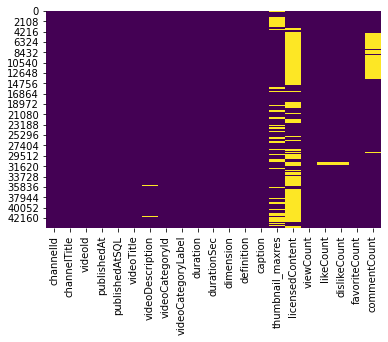

In [ ]:
sns.heatmap(youtube_df.isnull(),cbar=False,cmap='viridis')

The missing values can be better visualized using this isnull() heat map of the data set.


In [ ]:
pd.unique(youtube_df['licensedContent'])


array([ 1., nan])

Since there are only two unique values in 'licensedContent' i.e. 1.0 and nan, it is safe to assume that this column can be interpretted as a boolean with 1 representing the content is licensed while 0 representing not licensed.


In [ ]:
youtube_df['licensedContent'] = youtube_df['licensedContent'].astype('bool')

In [ ]:
youtube_df = youtube_df.drop(labels = 'thumbnail_maxres', axis = 1) # since thumbnail_maxres gives us no information about the engagement of the video

In [ ]:
is_NaN = youtube_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = youtube_df[row_has_NaN]
print(rows_with_NaN)

                      channelId channelTitle      videoId  \
1074   UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  ZGZCoA1oap4   
1734   UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  Iw5O7-yX2M0   
2150   UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  XsRnXUPZm1I   
2152   UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  eRjmigkBXYg   
2154   UCkndrGoNpUDV-uia6a9jwVg   ExcelIsFun  S_sN-cmg6yY   
...                         ...          ...          ...   
41786  UCkw4JCwteGrDHIsyIIKo4tQ     edureka!  G3IZhJ5VsQU   
41795  UCkw4JCwteGrDHIsyIIKo4tQ     edureka!  F8LOLBnvkNc   
41859  UCkw4JCwteGrDHIsyIIKo4tQ     edureka!       #NAME?   
41922  UCkw4JCwteGrDHIsyIIKo4tQ     edureka!  gLYTQ2-XRvk   
42605  UCkw4JCwteGrDHIsyIIKo4tQ     edureka!  fNyKZRgmrHU   

                publishedAt publishedAtSQL  \
1074   2014-02-09T05:02:37Z    9/2/14 5:02   
1734   2011-07-26T22:16:33Z  26/7/11 22:16   
2150   2010-07-22T12:28:03Z  22/7/10 12:28   
2152   2010-07-22T12:22:20Z  22/7/10 12:22   
2154   2010-07-22T12:20:27Z  22/7/10 

In [ ]:
print(youtube_df.loc[42605])

channelId                                      UCkw4JCwteGrDHIsyIIKo4tQ
channelTitle                                                   edureka!
videoId                                                     fNyKZRgmrHU
publishedAt                                        2014-08-28T11:49:54Z
publishedAtSQL                                            28/8/14 11:49
videoTitle               Android Projects by Edureka Students | Edureka
videoDescription      Watch Sample Class Recording: http://www.edure...
videoCategoryId                                                     NaN
videoCategoryLabel                                                  NaN
duration                                                            NaN
durationSec                                                         NaN
dimension                                                           NaN
definition                                                          NaN
caption                                                         

This confirms that the value of row index 42605 has most missing values and we should drop this row

In [ ]:
youtube_df.drop(labels=42605, axis=0, inplace = True) 

<AxesSubplot:>

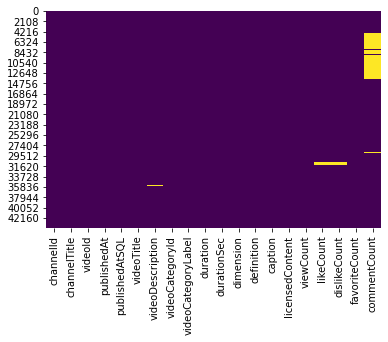

In [ ]:
sns.heatmap(youtube_df.isnull(),cbar=False,cmap='viridis')

In [ ]:
pd.unique(youtube_df['commentCount'])


array([4.0000e+00, 8.3000e+01, 6.6000e+01, 1.1400e+02, 1.3200e+02,
       8.7000e+01, 1.0900e+02, 8.8000e+01, 1.1700e+02, 1.0600e+02,
       6.0000e+01, 1.0200e+02, 9.4000e+01, 1.4000e+02, 1.7000e+02,
       1.1500e+02, 1.3800e+02, 1.1600e+02, 6.3000e+01, 1.2200e+02,
       1.6000e+02, 1.4500e+02, 1.5100e+02, 1.0100e+02, 1.4400e+02,
       5.6000e+01, 1.7800e+02, 1.0700e+02, 4.2000e+01, 1.0500e+02,
       8.9000e+01, 6.9000e+01, 1.2100e+02, 7.2000e+01, 7.4000e+01,
       6.5000e+01, 3.4000e+01, 5.2000e+01, 6.8000e+01, 5.0100e+02,
       8.1000e+01, 1.0400e+02, 1.2400e+02, 1.1000e+02, 1.4100e+02,
       1.5700e+02, 1.6500e+02, 1.6800e+02, 1.1200e+02, 1.6100e+02,
       2.0100e+02, 1.3900e+02, 1.4900e+02, 1.6200e+02, 1.3400e+02,
       9.7000e+01, 2.0400e+02, 1.3300e+02, 9.0000e+01, 2.1300e+02,
       1.3600e+02, 8.5000e+01, 7.7000e+01, 5.7000e+01, 2.7000e+01,
       5.4000e+01, 3.9000e+01, 4.8000e+01, 4.1000e+01, 8.0000e+01,
       7.6000e+01, 2.9000e+01, 4.9000e+01, 7.8000e+01, 3.2700e

In [ ]:
pd.unique(youtube_df['favoriteCount'])



array([0.])

On closer inspection we see that favoriteCount coloumn contains no information hence should be dropped from the data set.

In [ ]:
youtube_df = youtube_df.drop(labels = 'favoriteCount', axis = 1) # since it contains no information, just a coloum with zeros


In [ ]:
pd.unique(youtube_df['dislikeCount'])


array([0.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00, 7.0000e+00,
       4.0000e+00, 8.0000e+00, 6.0000e+00, 5.0000e+00, 1.1000e+01,
       1.0000e+01, 1.3000e+01, 1.4000e+01, 3.3000e+01, 1.2000e+01,
       9.0000e+00, 1.5000e+01, 1.6000e+01, 2.1000e+01, 1.8000e+01,
       1.7000e+01, 2.9000e+01, 1.9000e+01, 3.1000e+01, 1.1900e+02,
       1.2600e+02, 2.5000e+01, 3.6000e+01, 7.0000e+01, 4.1000e+01,
       3.2000e+01, 4.8000e+01, 5.2000e+01, 4.6000e+01, 2.0000e+01,
       4.7000e+01, 3.5000e+01, 2.2000e+01, 2.8000e+01, 2.4000e+01,
       2.6000e+01, 7.4000e+01, 9.8000e+01, 1.4100e+02, 3.8000e+01,
       3.4000e+01, 5.7500e+02, 2.7000e+01, 2.8300e+02, 4.4000e+01,
       6.0000e+01, 5.6000e+01, 9.1000e+01, 2.9200e+02, 4.2000e+01,
              nan, 1.6100e+02, 3.0600e+02, 9.4000e+01, 4.9000e+01,
       5.8000e+01, 7.1000e+01, 2.3000e+01, 3.0000e+01, 4.5000e+01,
       5.4000e+01, 6.2000e+01, 1.0500e+02, 4.3000e+01, 6.4000e+01,
       2.8600e+02, 9.5000e+01, 1.0700e+02, 5.0000e+01, 1.9800e

In [ ]:
pd.unique(youtube_df['likeCount'])


array([   22.,   396.,   206., ..., 10601.,  6414.,  2764.])

In [ ]:
pd.unique(youtube_df['dimension'])


array(['2d'], dtype=object)

On closer inspection we see that dimension coloumn contains no information hence should be dropped from the data set.

In [ ]:
youtube_df = youtube_df.drop(labels = 'dimension', axis = 1) # since it contains no information, just a coloum with zeros


In [ ]:
pd.unique(youtube_df['definition'])


array(['hd', 'sd'], dtype=object)

In [ ]:
pd.unique(youtube_df['viewCount'])


array([    0.,  5027.,  4668., ..., 24516.,  2309.,  5752.])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


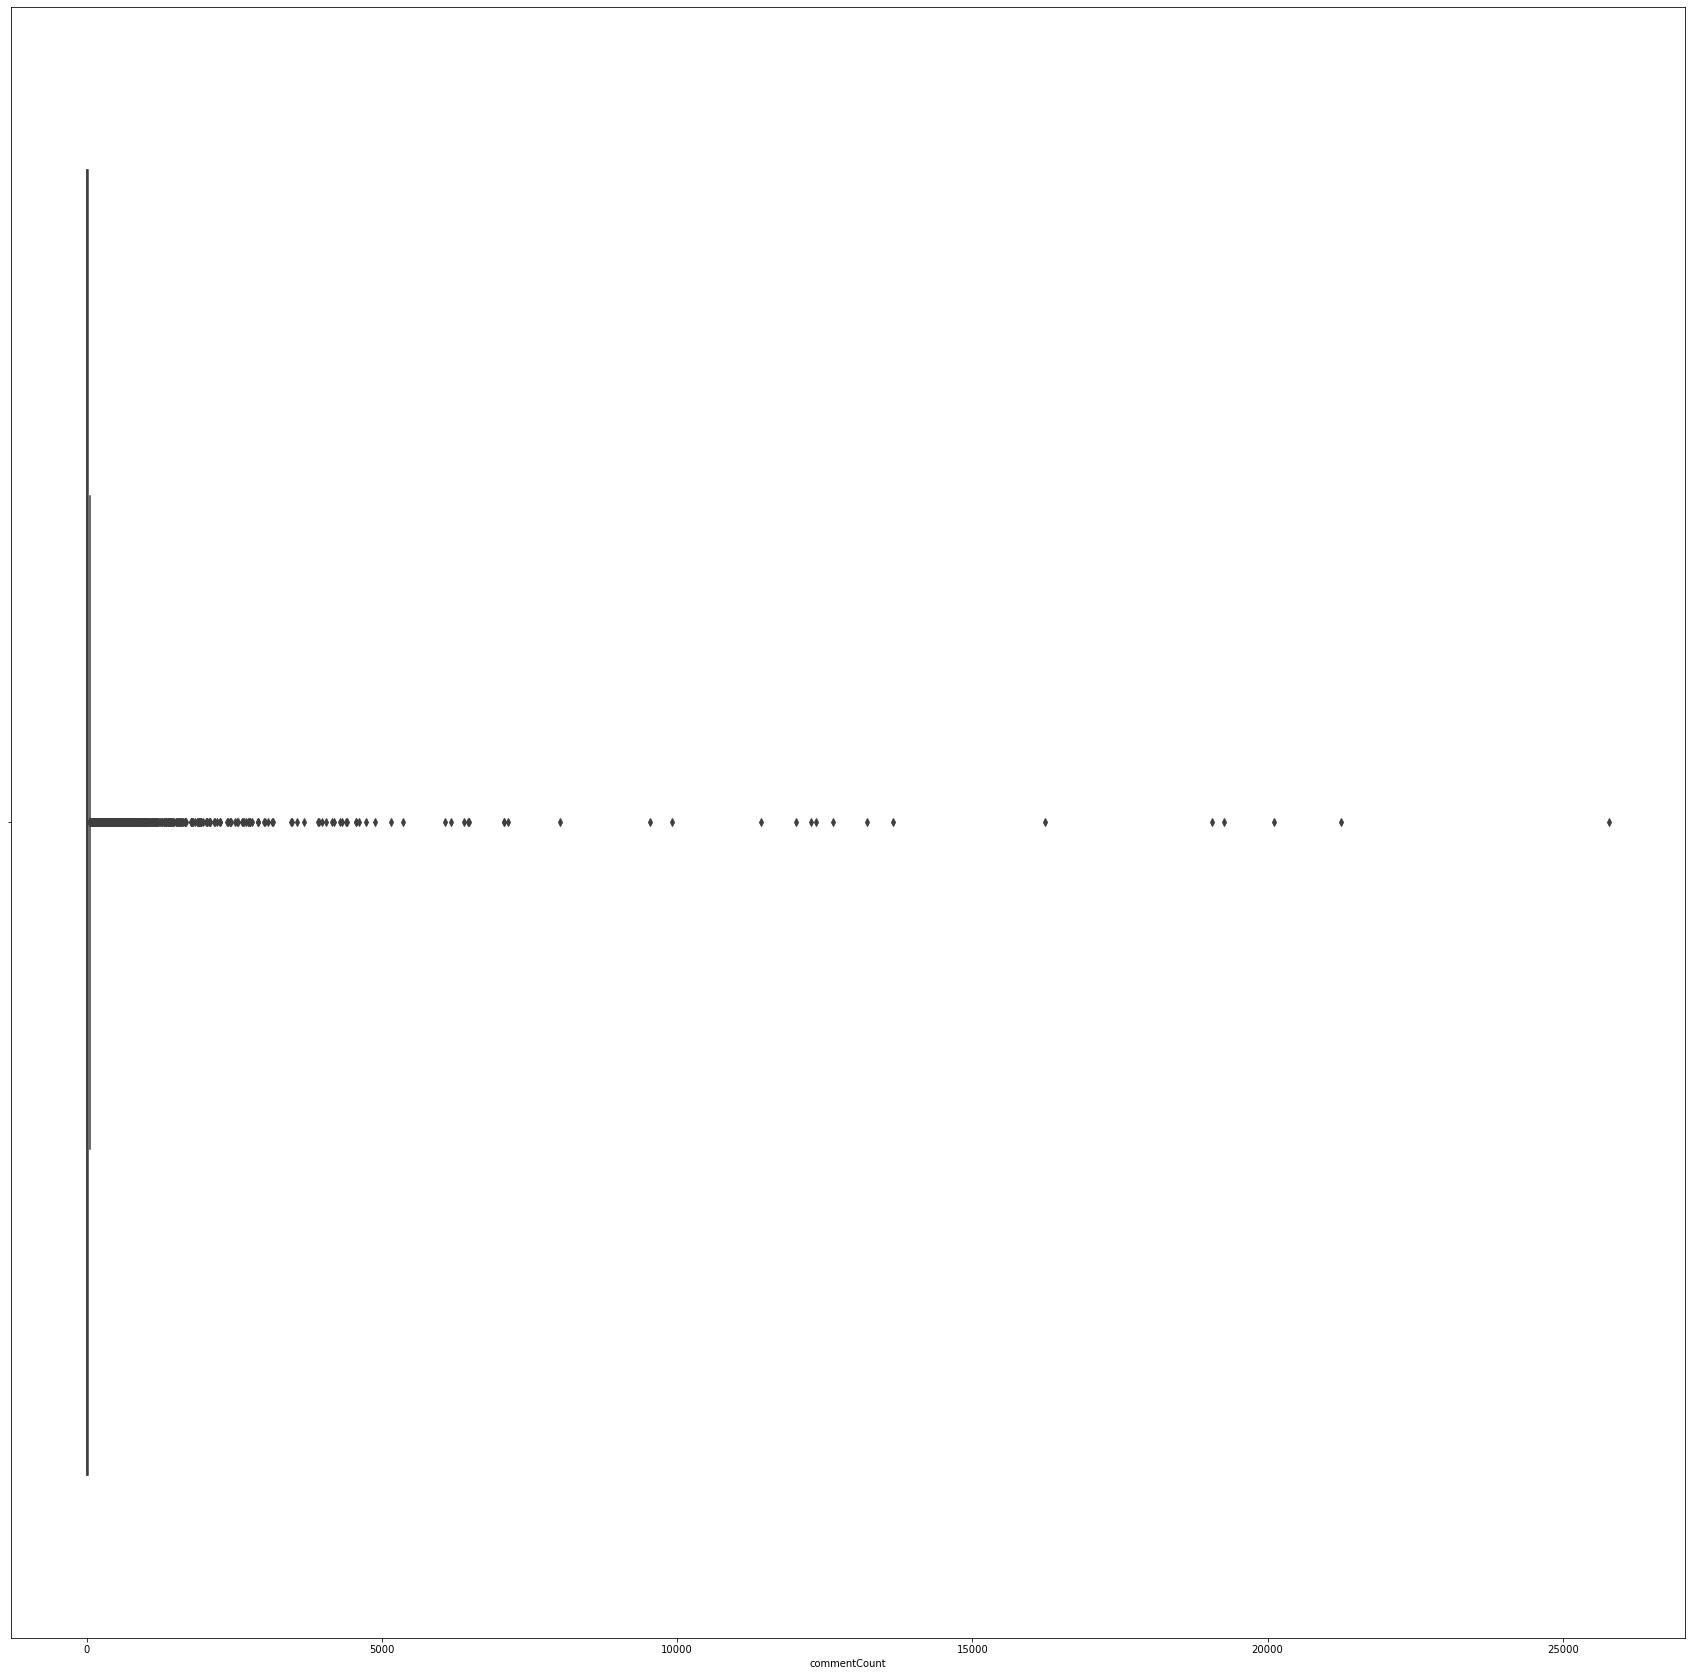

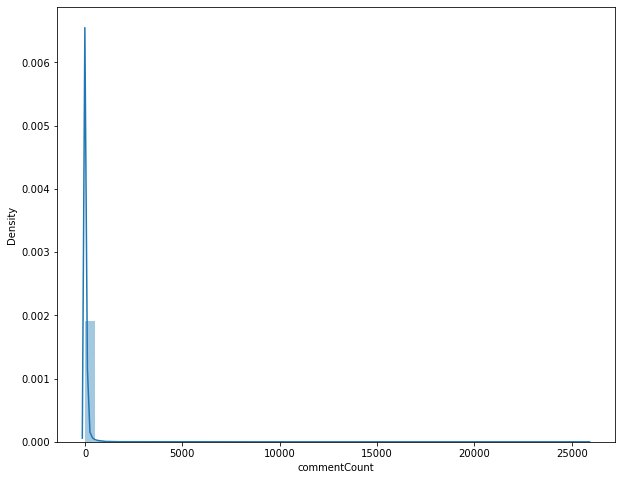

In [ ]:
# Box plot
#
fig, ax = plt.subplots(figsize = (30,30))
sns.boxplot(youtube_df.commentCount);
#
# Distribution plot
fig, ax = plt.subplots(figsize = (10,8))
sns.distplot(youtube_df.commentCount);

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


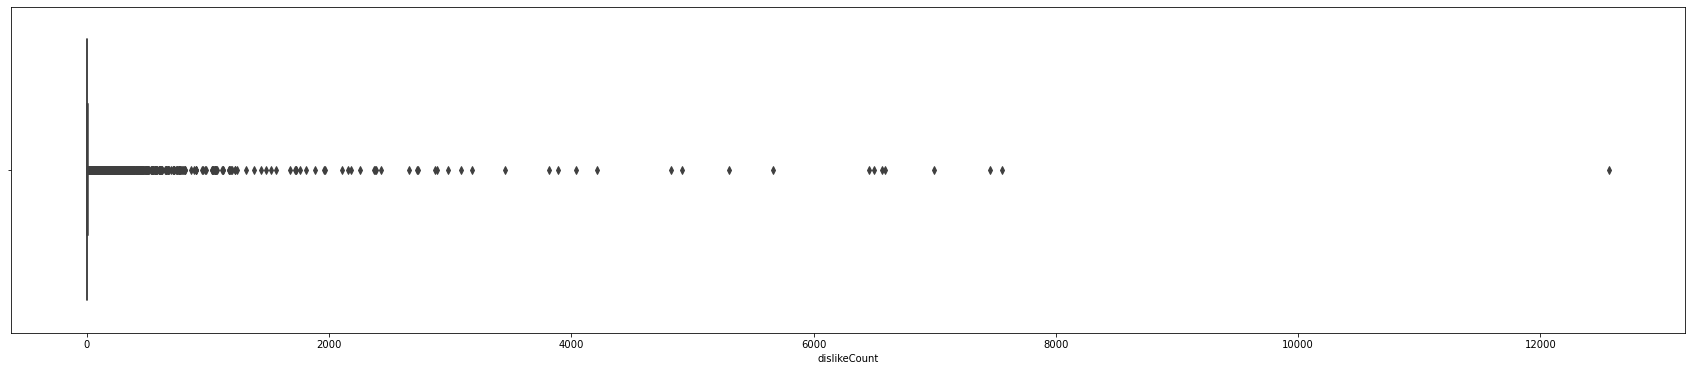

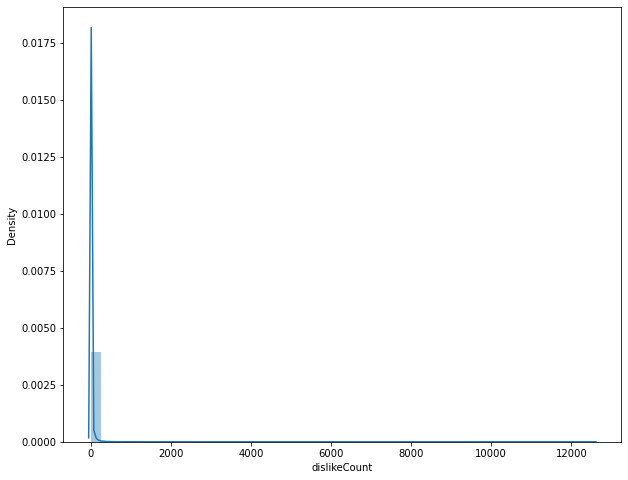

In [ ]:
# Box plot
#
fig, ax = plt.subplots(figsize = (30,6))
sns.boxplot(youtube_df.dislikeCount);
#
# Distribution plot
#
fig, ax = plt.subplots(figsize = (10,8))
sns.distplot(youtube_df.dislikeCount);

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


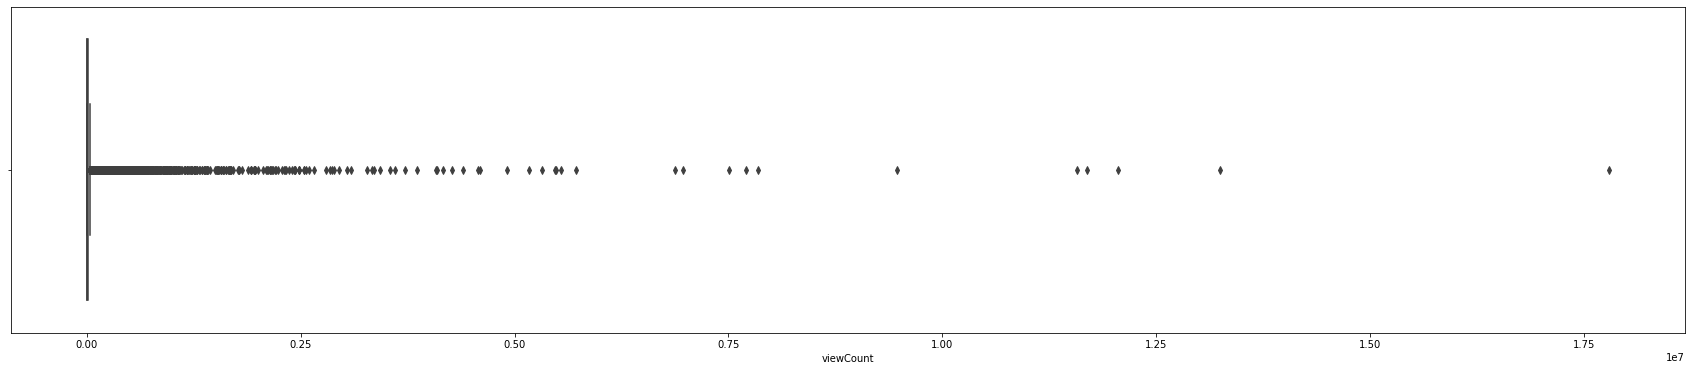

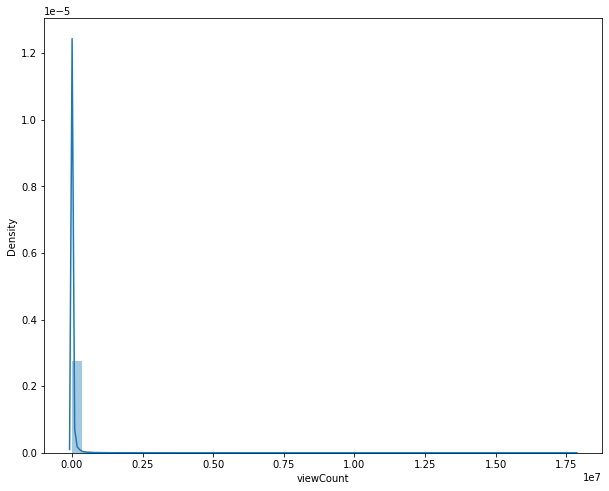

In [ ]:
# Box plot
#
fig, ax = plt.subplots(figsize = (30,6))
sns.boxplot(youtube_df.viewCount);
#
# Distribution plot
#
fig, ax = plt.subplots(figsize = (10,8))
sns.distplot(youtube_df.viewCount);


Since all three count values are skewed to the left, its a good idea to fill the Nan values with median rather than mean and the fact that it is not a categoriacal feature.

In [ ]:
youtube_df['commentCount'] = youtube_df['commentCount'].fillna(youtube_df['commentCount'].median())
youtube_df['likeCount'] = youtube_df['likeCount'].fillna(youtube_df['likeCount'].median())
youtube_df['dislikeCount'] = youtube_df['dislikeCount'].fillna(youtube_df['dislikeCount'].median())
youtube_df['viewCount'] = youtube_df['viewCount'].fillna(youtube_df['viewCount'].median())

<AxesSubplot:>

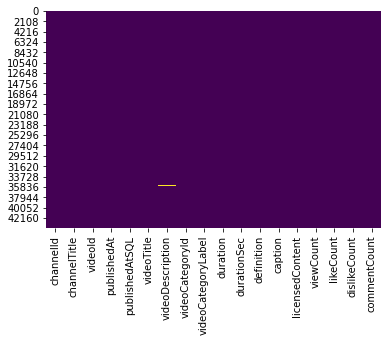

In [ ]:
sns.heatmap(youtube_df.isnull(),cbar=False,cmap='viridis')

Now the dataset is clean and complete apart from the description coloumn, which since is not categorical or numerical, cannont be completed. Moreover, it gives us a better insight as to if the description has an affect on the number of views of a video.

In [ ]:
youtube_df.head()

,channelId,channelTitle,videoId,publishedAt,publishedAtSQL,videoTitle,videoDescription,videoCategoryId,videoCategoryLabel,duration,durationSec,definition,caption,licensedContent,viewCount,likeCount,dislikeCount,commentCount
0,UCkndrGoNpUDV-uia6a9jwVg,ExcelIsFun,Z2Cy9IY7IBA,2020-08-20T20:39:38Z,20/8/20 20:39,Add 500 to All Numbers in Text String? LET or ...,Download Excel File: http://excelisfun.net/fil...,27.0,Education,PT11M51S,711.0,hd,False,True,0.0,22.0,0.0,4.0
1,UCkndrGoNpUDV-uia6a9jwVg,ExcelIsFun,oS_tUs51T0A,2020-08-17T21:23:13Z,17/8/20 21:23,Dynamic Excel Multiplication Table with Condit...,Download Excel File: http://excelisfun.net/fil...,27.0,Education,PT7M59S,479.0,hd,False,True,5027.0,396.0,0.0,83.0
2,UCkndrGoNpUDV-uia6a9jwVg,ExcelIsFun,yvmdIX9ZsPA,2020-08-14T15:02:25Z,14/8/20 15:02,Dueling Excel #191: Net Working Hours Spanning...,Download Excel File: http://excelisfun.net/fil...,27.0,Education,PT17M11S,1031.0,hd,False,True,4668.0,206.0,1.0,66.0
3,UCkndrGoNpUDV-uia6a9jwVg,ExcelIsFun,08kgJ8WM_Q0,2020-08-10T19:13:08Z,10/8/20 19:13,Append Two Number Columns and Sort. Excel Magi...,Download Excel File: http://excelisfun.net/fil...,27.0,Education,PT5M10S,310.0,hd,False,True,5375.0,472.0,3.0,114.0
4,UCkndrGoNpUDV-uia6a9jwVg,ExcelIsFun,h-qLNikIs-0,2020-08-03T22:44:45Z,3/8/20 22:44,LET Function Advanced Array Formula for Dynami...,Download Excel File: http://excelisfun.net/fil...,27.0,Education,PT14M32S,872.0,hd,False,True,5802.0,313.0,1.0,132.0


In [ ]:
youtube_df = youtube_df.drop(labels = 'channelId', axis = 1) # since it contains no information, just a coloum with zeros
youtube_df = youtube_df.drop(labels = 'videoId', axis = 1) # since it contains no information, just a coloum with zeros
youtube_df = youtube_df.drop(labels = 'publishedAtSQL', axis = 1) # since it contains no information, just a coloum with zeros
youtube_df = youtube_df.drop(labels = 'publishedAt', axis = 1) # since it contains no information, just a coloum with zeros
youtube_df = youtube_df.drop(labels = 'videoTitle', axis = 1) # since it contains no information, just a coloum with zeros
youtube_df = youtube_df.drop(labels = 'videoDescription', axis = 1) # since it contains no information, just a coloum with zeros
youtube_df = youtube_df.drop(labels = 'duration', axis = 1) # since it contains no information, just a coloum with zeros
youtube_df = youtube_df.drop(labels = 'caption', axis = 1) # since it contains no information, just a coloum with zeros
youtube_df = youtube_df.drop(labels = 'videoCategoryId', axis = 1) # since it contains no information, just a coloum with zeros
youtube_df = youtube_df.drop(labels = 'licensedContent', axis = 1) # since it contains no information, just a coloum with zeros




In [ ]:
youtube_df.head(10)

,channelTitle,videoCategoryLabel,durationSec,definition,viewCount,likeCount,dislikeCount,commentCount
0,ExcelIsFun,Education,711.0,hd,0.0,22.0,0.0,4.0
1,ExcelIsFun,Education,479.0,hd,5027.0,396.0,0.0,83.0
2,ExcelIsFun,Education,1031.0,hd,4668.0,206.0,1.0,66.0
3,ExcelIsFun,Education,310.0,hd,5375.0,472.0,3.0,114.0
4,ExcelIsFun,Education,872.0,hd,5802.0,313.0,1.0,132.0
5,ExcelIsFun,Education,362.0,hd,7055.0,544.0,2.0,87.0
6,ExcelIsFun,Education,218.0,hd,6283.0,541.0,3.0,109.0
7,ExcelIsFun,Education,710.0,hd,9407.0,443.0,3.0,88.0
8,ExcelIsFun,Education,111.0,hd,6270.0,336.0,1.0,66.0
9,ExcelIsFun,Education,292.0,hd,9011.0,713.0,7.0,117.0


In [ ]:
youtube_df[youtube_df.viewCount==0]

,channelTitle,videoCategoryLabel,durationSec,definition,viewCount,likeCount,dislikeCount,commentCount
0,ExcelIsFun,Education,711.0,hd,0.0,22.0,0.0,4.0
10325,Packt Video,Science & Technology,238.0,hd,0.0,0.0,0.0,4.0
11307,Packt Video,Science & Technology,494.0,hd,0.0,0.0,0.0,4.0
29704,Analytics India Magazine,Science & Technology,2398.0,sd,0.0,0.0,0.0,0.0


Since the viewCount cannot be zero if there is a likeCount or commentCount. Hence we will remove theses rows from the dataset.

In [ ]:
youtube_df.drop(labels=0, axis=0, inplace = True) 
youtube_df.drop(labels=10325, axis=0, inplace = True) 
youtube_df.drop(labels=11307, axis=0, inplace = True) 
youtube_df.drop(labels=29704, axis=0, inplace = True) 

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nimesh-singh-mech/youtube-project-jovian" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nimesh-singh-mech/youtube-project-jovian


'https://jovian.ai/nimesh-singh-mech/youtube-project-jovian'

## Exploratory Analysis and Visualization

After cleaning our data, in this section, we will explore the relations in between our data coloumns and other features using visualizations



In [ ]:
youtube_df.describe()

,durationSec,viewCount,likeCount,dislikeCount,commentCount
count,44256.000000,4.425600e+04,44256.000000,44256.000000,44256.000000
mean,808.792548,3.238494e+04,528.679162,14.933681,38.691025
std,816.984431,2.288103e+05,5882.039205,145.033355,345.736119
min,0.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,247.000000,3.070000e+02,2.000000,0.000000,1.000000
50%,471.000000,2.262000e+03,18.000000,1.000000,4.000000
75%,1068.000000,1.289825e+04,121.000000,5.000000,13.000000
max,3599.000000,1.778718e+07,432355.000000,12563.000000,25774.000000


<AxesSubplot:xlabel='definition', ylabel='count'>

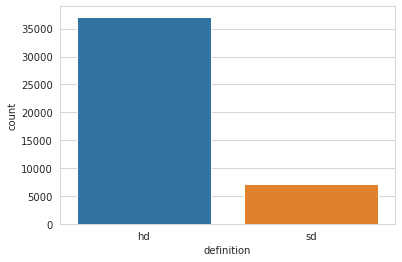

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="definition",data=youtube_df)

This plot shows us that most of the data comprises of HD quality videos i.e. almost 87 percent of the videos

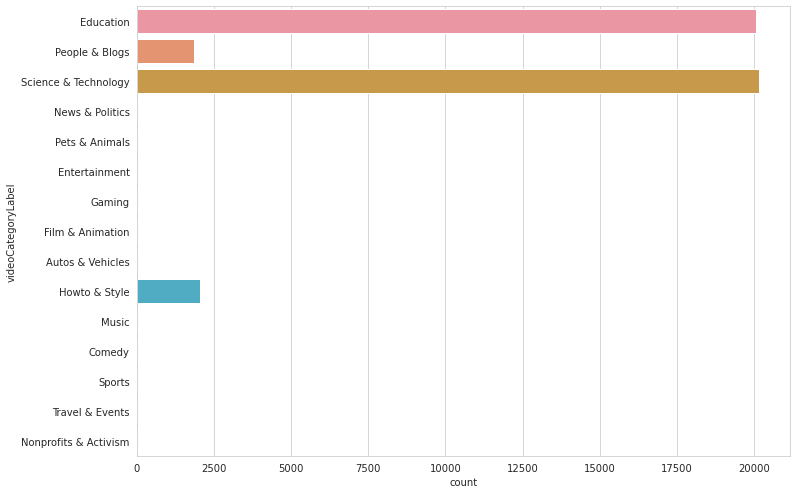

In [ ]:
fig, ax = plt.subplots(figsize= (11.7, 8.27))
sns.set_style("whitegrid")
sns.countplot(y="videoCategoryLabel",data=youtube_df);

Most of the videos in this data set belongs to "Education" or "Science&Technology" category while "Howto style" and "people and blogs" seems to the second in count while all the other categories count are minimal.

Text(0.5, 0, 'durationSec')

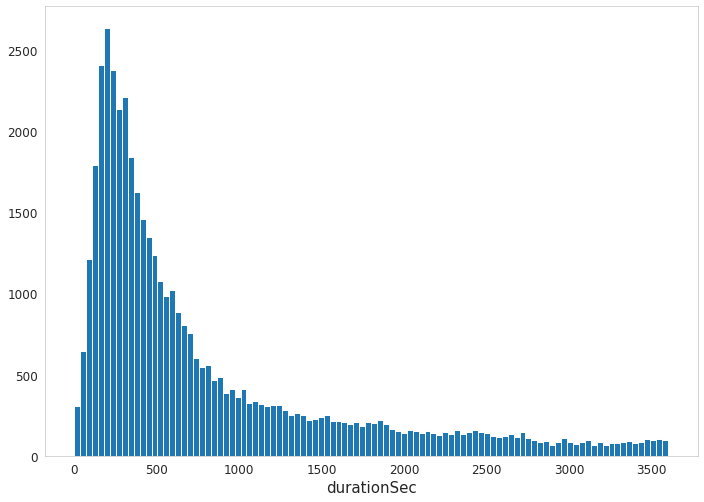

In [ ]:
fig, ax = plt.subplots(figsize= (11.7, 8.27))
youtube_df['durationSec'].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("durationSec", fontsize=15)

#plt.xlim([22.0,3700.0])

This histogram shows us that the majority of duration of videos in our dataset lies in and around 200-500 seconds mark.

In [ ]:
youtube_df["likeRatio"] = (youtube_df["likeCount"] / youtube_df["viewCount"])
youtube_df["dislikeRatio"] = (youtube_df["dislikeCount"] / youtube_df["viewCount"])

Let us save and upload our work to Jovian before continuing

In [ ]:
youtube_df[youtube_df.likeRatio>1]

,channelTitle,videoCategoryLabel,durationSec,definition,viewCount,likeCount,dislikeCount,commentCount,likeRatio,dislikeRatio
30677,H2O.ai,Science & Technology,28.0,hd,10.0,18.0,1.0,0.0,1.8,0.100000
30696,H2O.ai,Science & Technology,177.0,hd,15.0,18.0,1.0,0.0,1.2,0.066667


Since by defination the likeRation cannot be over 1 i.e. the likeCount can never be more than the viewCount, we have to drop these two rows.

In [ ]:
youtube_df.drop(labels=30677, axis=0, inplace = True) 
youtube_df.drop(labels=30696, axis=0, inplace = True) 

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nimesh-singh-mech/youtube-project-jovian" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nimesh-singh-mech/youtube-project-jovian


'https://jovian.ai/nimesh-singh-mech/youtube-project-jovian'

## Asking and Answering Questions

In this section we will be grouping the data on the basis of their category to answer question like which category has the most views or likes etc. Since the data was more in number for a few categories than others, we have taken a mean value of all these parameters rather than sum.



In [ ]:
grp = youtube_df.groupby("videoCategoryLabel")
a = grp["viewCount"].agg(np.mean)
b = grp["durationSec"].agg(np.mean)
c = grp["likeCount"].agg(np.mean)
d = grp["dislikeCount"].agg(np.mean)
e = grp["likeRatio"].agg(np.mean)
f = grp["dislikeRatio"].agg(np.mean)

print(a)
print(b)
print(c)
print(d)
print(e)
print(f)


videoCategoryLabel
Autos & Vehicles          46874.500000
Comedy                   986133.666667
Education                 55368.887670
Entertainment             77805.666667
Film & Animation           4824.937500
Gaming                     8307.333333
Howto & Style             15558.580440
Music                      1984.000000
News & Politics             975.333333
Nonprofits & Activism     10862.000000
People & Blogs            28150.620541
Pets & Animals            13512.846154
Science & Technology      11569.383569
Sports                     6088.125000
Travel & Events             459.205882
Name: viewCount, dtype: float64
videoCategoryLabel
Autos & Vehicles         1485.000000
Comedy                    429.666667
Education                 977.688647
Entertainment            1497.545455
Film & Animation          669.791667
Gaming                    152.000000
Howto & Style             329.990709
Music                     227.500000
News & Politics           155.000000
Nonprofits &

#### Q1: Which category has the most views

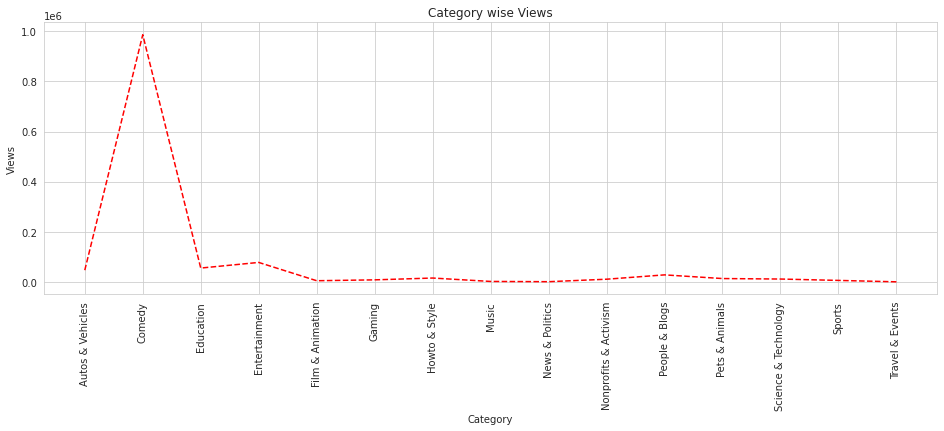

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(a,"r--",)
plt.xticks(rotation=90)
plt.title("Category wise Views")
plt.xlabel("Category")
plt.ylabel("Views")
plt.show()

#### Q2: Which category has the longest videos

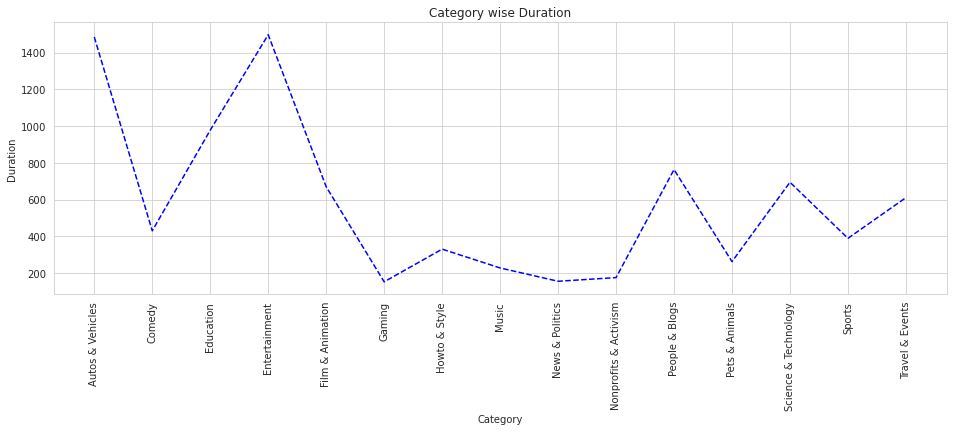

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(b,"b--")
plt.xticks(rotation=90)
plt.title("Category wise Duration")
plt.xlabel("Category")
plt.ylabel("Duration")
plt.show()

#### Q3: Which category has the most likes

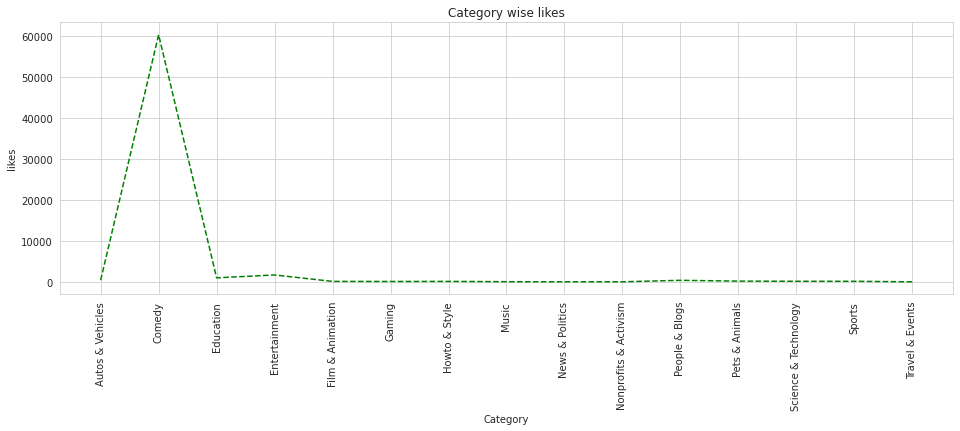

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(c,"g--")
plt.xticks(rotation=90)
plt.title("Category wise likes")
plt.xlabel("Category")
plt.ylabel("likes")
plt.show()

#### Q4: Which category has the most like to view ratio

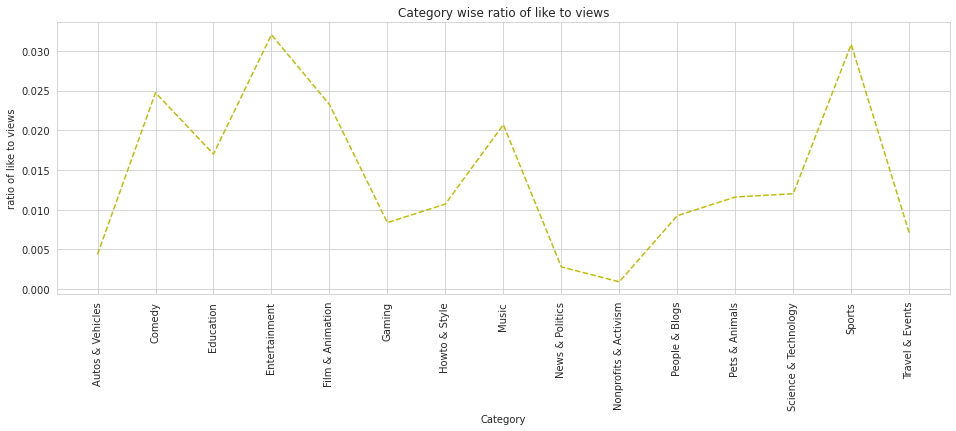

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(e,"y--")
plt.xticks(rotation=90)
plt.title("Category wise ratio of like to views")
plt.xlabel("Category")
plt.ylabel("ratio of like to views")
plt.show()

#### Q5: Which category has the most dislike to view ratio

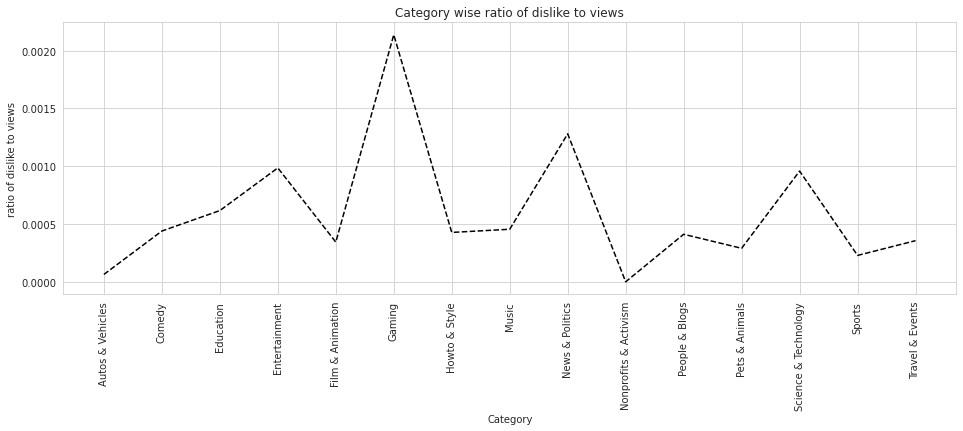

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(f,"k--")
plt.xticks(rotation=90)
plt.title("Category wise ratio of dislike to views")
plt.xlabel("Category")
plt.ylabel("ratio of dislike to views")
plt.show()

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nimesh-singh-mech/youtube-project-jovian" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nimesh-singh-mech/youtube-project-jovian


'https://jovian.ai/nimesh-singh-mech/youtube-project-jovian'

## Inferences and Conclusion

From the above data it can be infered that category wise Comedy has the most number of views per video and hence likes per video, since earlier we saw that the dataset had a lot of videos from 2-3 categories and was not equally spaced, hence it was important to consider the mean values of all factors.

Automotive and Entertainment videos turned out to be the longest. Likes per view, a feature which gives a better idea about the video, shows that comedy, entertainment, sports and music are the most liked categories while non profit and activisim are the least liked which does not give a positive picture about the humans watching youtube videos.

Gaming audience seems to be the most demanding shelling out the most number of dislikes per views than any other category

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nimesh-singh-mech/youtube-project-jovian" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nimesh-singh-mech/youtube-project-jovian


'https://jovian.ai/nimesh-singh-mech/youtube-project-jovian'

## References and Future Work

The dataset can be improved in the future to include roughly equal data of video from all categories using which a better  understanding can be infered of the audience browsing on youtube.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nimesh-singh-mech/youtube-project-jovian" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nimesh-singh-mech/youtube-project-jovian


'https://jovian.ai/nimesh-singh-mech/youtube-project-jovian'